<a href="https://colab.research.google.com/github/VorobyvEgor/Seminar_Sber/blob/main/Seminars/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
def f(x):
  return 5 * x[0] ** 2 + x[1] ** 2

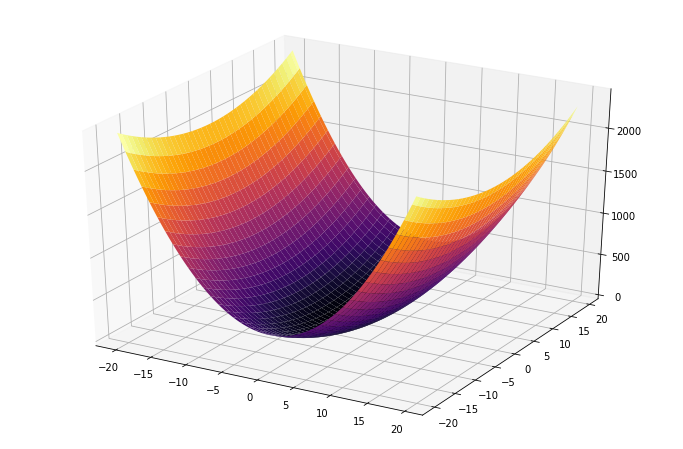

In [3]:
u, v = np.mgrid[-20:20:0.5, -20:20:0.5]
z = f([u, v])
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno')
fig.show()

In [4]:
def g(x):
  return np.array([10 * x[0], 2 * x[1]])

In [5]:
g([1, 2])

array([10,  4])

In [10]:
def grad_descent(theta0, func_grad, func, eta=0.01, tolerance=0.0001, n_iter=150):
  """
  theta0 - начальный вектор аргументов функции (начальное приближение, откуда шагаем)
  func_grad - градиент функциия (объект функции на питоне)
  func - функция, минимум которой хотим найти
  eta - leraning rate (шаг обучения)
  tolerance - критерий остановки (если изменение весов меньше чем это значение)
  n_iter - количество итераций в градиентном спуске
  """

  theta = theta0
  history = [theta0]

  for iter_id in tqdm.tqdm(range(n_iter)):
    gr = func_grad(theta)
    # theta = theta - eta * gr #(gr / np.sqrt((gr**2).sum()))
    theta = theta - eta * gr

    history.append(theta)

    # print(func(theta), func(history[-2]))

    # if (np.abs(theta - history[-2]) < tolerance).all():
    if np.abs(func(theta) - func(history[-2])) < tolerance:
      break

  return np.array(history)

In [11]:
hist = grad_descent(np.array([18, 7]), g, f, n_iter=10000)

  2%|▏         | 245/10000 [00:00<00:00, 40004.85it/s]


In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(hist)
plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

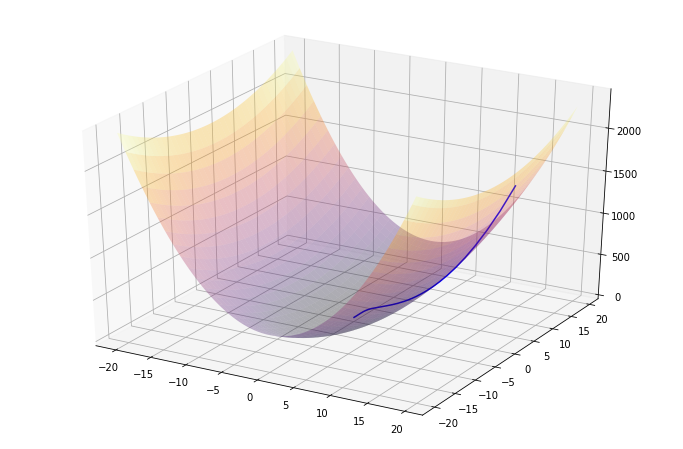

In [9]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno', alpha=0.3)
ax.plot(hist[:, 0], hist[:, 1], f([hist[:, 0], hist[:, 1]]), color='blue')
fig.show()